# Insurance Regression Analysis by TanishHP

### General Description
The dataset is retrieved from Machine Learning Website by Professor Eric Suess at http://www.sci.csueastbay.edu/~esuess/stat6620/#week-6. It contains 7 features (4 numerical and 3 categorical), and the target column contains medical expenses incurred by each individual.  

### Goals

1. Divide the features into two sections: numerical and categorical in order to clean and transform each appropriately. 
2. For categorical features:
    a. create a dataframe and clean missing data
    b. represent data visually in an appropriate format
    c. drop irrelevant features within reason and logic presented. 
    d. convert categorical variables to represent in a binary format.  
3. For numerical features:
    a. create a dataframe and clean missing data
    b. represent data visually in an appropriate format
    c. drop irrelevant features within reason and logic presented. 
4. Create a Linear Model, fit and predict the relevant features. 
5. Use appropriate metrics to measure effectiveness of model. 


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/kaggle/input/insurance-premium-prediction/insurance.csv


In [2]:
df = pd.read_csv('/kaggle/input/insurance-premium-prediction/insurance.csv')
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [3]:
df.shape

(1338, 7)

In [4]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


##### It is quite lucky that there are no null values to deal with. 

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [7]:
#There are 7 columns, 6 of which are features which can be subdivided into categorical_cols and numerical_cols
all_columns = list(df.columns)
print(all_columns)
categorical_cols = ['sex', 'smoker', 'region']
numerical_cols = ['age', 'children', 'bmi']
target_col = 'expenses'

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses']


In [8]:
#Creating two dataframes, one to store numerical data and one to store categorical data

#I needed to transform categorical data to some type of numerical format. This was required if I ever to train my 
#linear model with categorical data. 

# I used PD.GET_DUMMIES function to tranform my categorical data. 

categorical_X = pd.DataFrame()
for i in categorical_cols:
    dummies = pd.get_dummies(df[i])
    categorical_X = pd.concat([categorical_X, dummies], axis=1)
numerical_X = pd.DataFrame(df[numerical_cols])

## Graphing Categorical Variables vs Expenses

NameError: name 'fig' is not defined

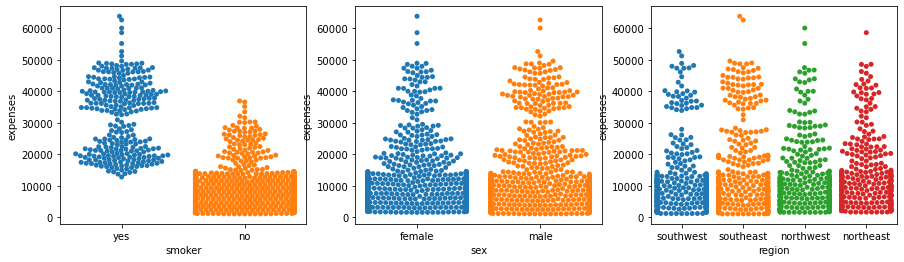

In [9]:
cat_fig, axes=plt.subplots(1, 3, figsize=(15, 4))
sns.swarmplot(ax=axes[0], x='smoker', y='expenses', data=df)
sns.swarmplot(ax=axes[1], x='sex', y='expenses', data=df)
sns.swarmplot(ax=axes[2], x='region', y='expenses', data=df)
fig.suptitle('Categorical Variables vs Expenses', fontsize=16)

The best way to understand any categorical data is through relative frequency, which is why, it made so much more sense to use swarm plot to visualise my data. 

The first plot displayed shows that the smokers generally incur more expense than non-smokers. This makes sense as smoking is dangerous to health and makes people who practise it susceptible to more health problems. This feature definitely has a place in the multiple linear regression model that we will later train. 

The second plot, compares expenses to the sex of an individual. There isnt much variation in expense which makes sense as if the sample is large enough, and is random enough. It is reasonable to drop this feature. 

The third plot compares expense to the region where an individual belongs from. This also shows hardly any eye-popping variation and it doesnt make sense to train our model with this data. 

## Graphing Numerical Variables vs Expenses

Text(0.5, 0.98, 'Numerical Variables vs Expenses')

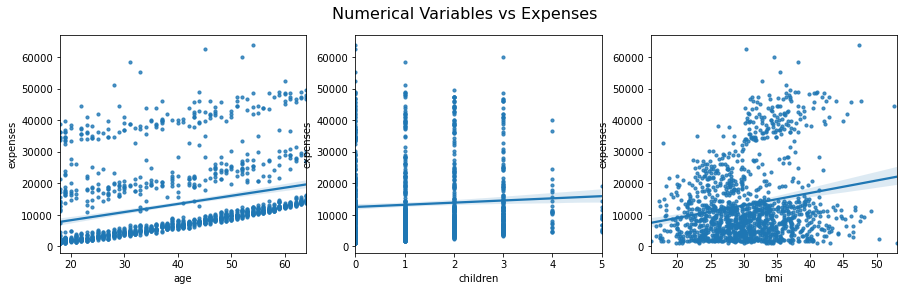

In [10]:
fig, axes=plt.subplots(1, 3, figsize=(15, 4))
sns.regplot(ax=axes[0], x="age", y="expenses", data=df, scatter_kws={'s':10})
sns.regplot(ax=axes[1], x="children", y="expenses", data=df, scatter_kws={'s':10})
sns.regplot(ax=axes[2], x="bmi", y="expenses", data=df, scatter_kws={'s':10})
fig.suptitle('Numerical Variables vs Expenses', fontsize=16)

The best way to understand numerical data is through a scatter plot shown above. It also contains the line of best fit to give some perspective. 

The first plot displayed shows that age generally is positively correlated with expenses. We will keep this feature. 

The second plot, has a very weak correlation (almost 0). We can drop this feature. 

The third plot compares BMI (body mass index) to expenses which has some positive correlation with expenses. This makes sense as a high bmi indicates obesity and thus further medical issues. 

I have plotted correlations of features with expenses below. 

### Correlation of Numerical Variables with Expenses

In [11]:
df[['age', 'children', 'bmi', 'expenses']].corr().iloc[:-1, -1].round(2)

age         0.30
children    0.07
bmi         0.20
Name: expenses, dtype: float64

## Creating a Multiple Linear Regression Model and Metrics

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [13]:
#As discussed before, this process drops irrelevant features

categorical_X.drop(['female', 'male', 'northeast', 'northwest', 'southeast',
       'southwest'], axis=1, inplace=True)
numerical_X.drop(['children'], axis=1, inplace=True)

In [14]:
linearModel = LinearRegression()

In [15]:
X = pd.concat([categorical_X, numerical_X], axis=1)
Y = df[target_col]

In [16]:
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.3, random_state=0)

In [17]:
linearModel.fit(train_X, train_Y)

LinearRegression()

In [18]:
pred_Y = linearModel.predict(test_X)

In [19]:
print("MEAN ABSOLUTE ERROR: ", mean_absolute_error(test_Y, pred_Y))
print("R2 SCORE: ", r2_score(test_Y, pred_Y))
print("MEAN SQUARED ERROR: ", mean_squared_error(test_Y, pred_Y))
print("ROOT MEAN SQUARED ERROR: ", (mean_squared_error(test_Y, pred_Y)**0.5))

MEAN ABSOLUTE ERROR:  4010.9553172661163
R2 SCORE:  0.787333158878935
MEAN SQUARED ERROR:  33913867.56797542
ROOT MEAN SQUARED ERROR:  5823.561416176137
